In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
## import some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into Dependent and independent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [ ]:
## concat the above variables with dataset we need to drop the old features and concat the above

X = X.drop(['Geography', 'Gender'], axis = 1)

In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
## Split the data into Train and Test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Part-2: Let's create Artificial Neural Network(ANN) Implementation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
## Let's initialize the ANN

classifier = Sequential()

In [ ]:
## Adding the input layer

classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:
## Adding first hidden layer

classifier.add(Dense(units = 5, activation = 'relu'))

## We can use dropout as below
## classifier.add(Dropout(0.3))

In [ ]:
## Adding second hidden layer

classifier.add(Dense(units = 7, activation = 'relu'))

In [ ]:
## Adding output layer

classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
## Early Stopping
## https://keras.io/api/callbacks/early_stopping/

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.3, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
560/560 [==============================] - 10s 8ms/step - loss: 0.4455 - accuracy: 0.8236 - val_loss: 0.3870 - val_accuracy: 0.8512
Epoch 2/1000
560/560 [==============================] - 4s 7ms/step - loss: 0.4082 - accuracy: 0.8380 - val_loss: 0.3904 - val_accuracy: 0.8421
Epoch 3/1000
560/560 [==============================] - 4s 6ms/step - loss: 0.4021 - accuracy: 0.8386 - val_loss: 0.3993 - val_accuracy: 0.8396
Epoch 4/1000
560/560 [==============================] - 6s 10ms/step - loss: 0.3975 - accuracy: 0.8411 - val_loss: 0.3815 - val_accuracy: 0.8479
Epoch 5/1000
560/560 [==============================] - 3s 6ms/step - loss: 0.3949 - accuracy: 0.8434 - val_loss: 0.3757 - val_accuracy: 0.8475
Epoch 6/1000
560/560 [==============================] - 3s 6ms/step - loss: 0.4048 - accuracy: 0.8382 - val_loss: 0.3747 - val_accuracy: 0.8508
Epoch 7/1000
560/560 [==============================] - 4s 6ms/step - loss: 0.3980 - accuracy: 0.8343 - val_loss: 0.3779 - val_accurac

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

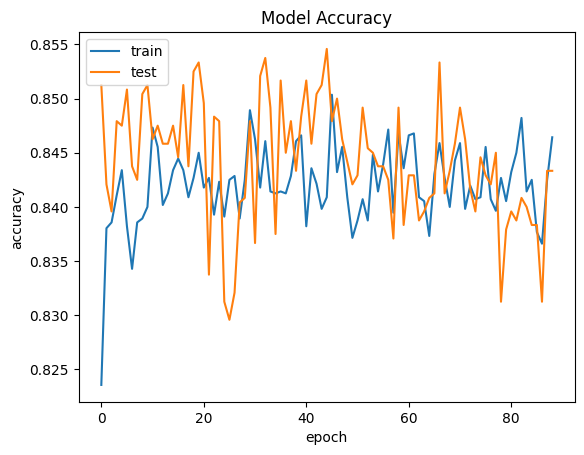

In [ ]:
## Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

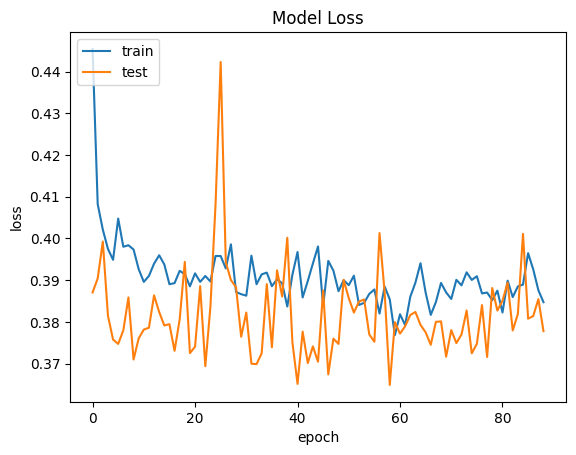

In [ ]:
## Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
## Part-3: Make the predictions and evaluate a model

# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
## Make the confusion matrix

from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)
con

array([[1559,   36],
       [ 244,  161]])

In [ ]:
## Calculate the accuracy

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

## To get the weights we worked on execute below line
## classifier.get_weights()

0.86